In [ ]:
# Simulación de Montecarlo del portafolio con valores del IBEX35 usando el movimiento Browniano.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['ACS', 'AENA','AMS', 'BBVA', 'BKT', 'CABK', 'CLNX', 'COL', 'ENG', 'FDR', 'FER','GRF', 'IBE','MRL', 'MTS', 'REE', 'REP', 'SAB', 'SAN', 'SLR', 'TEF']
stocks = [stock + '.MC' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

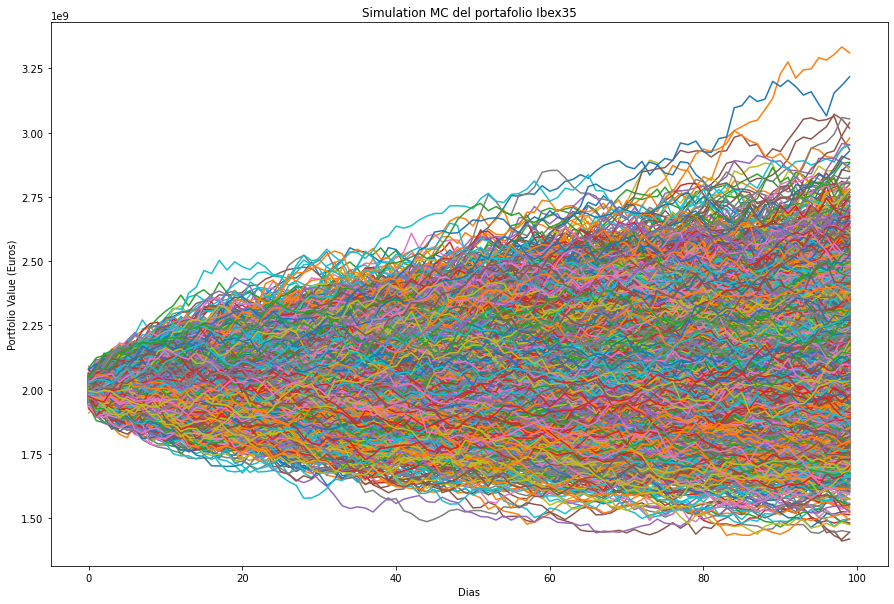

In [7]:
# Monte Carlo Method
mc_sims = 4000 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 2000000000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.figure(figsize=(15,10)) #Tamaño del gráfico por defecto
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value (Euros)')
plt.xlabel('Dias')
plt.title('Simulation MC del portafolio Ibex35')
plt.show()

# Referencia Australian Stock Exchange
# Simulating stock price dynamics using Geometric Brownian Motion
https://asxportfolio.com/shares-monte-carlo-method-simulated-stock-portfolio

S: Stock price
μ: The drift coefficient, that is, the average return over a given period or the instantaneous expected return
σ: The diffusion coefficient, that is, how much volatility is in the drift Wt
